# Present Value

Present value is an idea that money now is worth more than money in the future because you can use it to do things like invest or consume. In this lesson we work through all the basics of present value and use some plots to drive home these points. Below I define a function for plotting cash flows. Do not worry about how it works, it might be a little too advanced, and I just need to define it to more easily show these cashflows on a timeline.

In [1]:
import matplotlib.pyplot as plt

def timelinePlot(periods):
    #Create our plot
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(111)
    
    #Set the limits of our plots (in terms of values, not dimensions)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    
    #Set the minimums that we will be plotting in (we give a 1 or 10% margin on each side)
    xmin = 1
    xmax = 9
    
    #Set the y of where our plot will be centered around, 5 is the middle
    y = 5
    
    #Set height for our ticks
    height = 1
    
    #Get the spacing between each tick
    delta = (xmax-xmin)/periods
    
    #Create the positions for each tick
    positions = [xmin+delta*x for x in list(range(periods+1))]
    
    #Plot the horizontal line
    plt.hlines(y, xmin, xmax, color='grey')

    for t in range(periods+1):
        #Plot the tick
        plt.vlines(positions[t], y - .5, y + .5, color='grey')
        
        #Plot the time period below
        plt.text(positions[t], y-1.2, t, horizontalalignment='center',fontsize=14)
    
    #Get rid of axes
    plt.axis('off')
    plt.show()

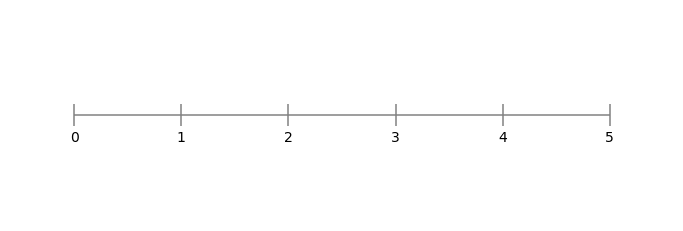

In [2]:
#Now let's call our helper function to see what a timeline for a 5 year period looks like
timelinePlot(5)

Now I am going to add the ability to add a value. It will take the form of a tuple where the first value is the cashflow and the second value is the time that it happens at.

In [3]:
def timelinePlot(periods,value):
#Create our plot
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(111)
    
    #Set the limits of our plots (in terms of values, not dimensions)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    
    #Set the minimums that we will be plotting in (we give a 1 or 10% margin on each side)
    xmin = 1
    xmax = 9
    
    #Set the y of where our plot will be centered around, 5 is the middle
    y = 5
    
    #Set height for our ticks
    height = 1
    
    #Get the spacing between each tick
    delta = (xmax-xmin)/periods
    
    #Create the positions for each tick
    positions = [xmin+delta*x for x in list(range(periods+1))]
    
    #Plot the horizontal line
    plt.hlines(y, xmin, xmax, color='grey')

    for t in range(periods+1):
        #Plot the tick
        plt.vlines(positions[t], y - .5, y + .5, color='grey')
        
        #Plot the time period below
        plt.text(positions[t], y-1.2, t, horizontalalignment='center',fontsize=14)
        
    #Get rid of axes
    plt.axis('off')
    
    #Plot a red dot on the year that our value is at
    plt.plot(positions[value[1]],y, 'ro', ms = 15, mfc = 'r')
    
    #Plot the value above, use rounding to keep it clean
    plt.text(positions[value[1]], y+1.2, "$"+str(round(value[0],1)), horizontalalignment='center',fontsize=18)

    
    plt.show()

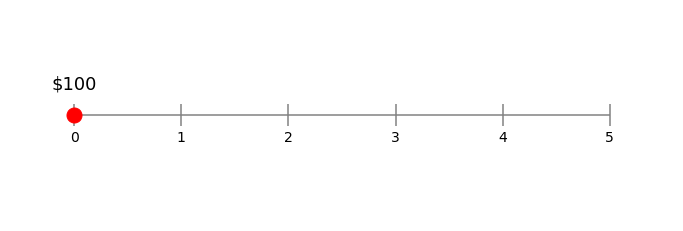

In [4]:
timelinePlot(5,(100,0))

Remember from the last lesson how compounding works. In the code below we are going to have our investment at time 0 grow by 5% each period. We will plot the value expanding over the timeframe.

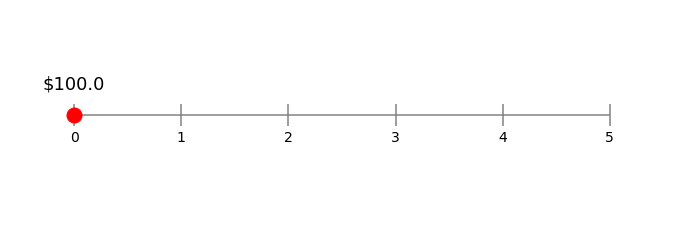

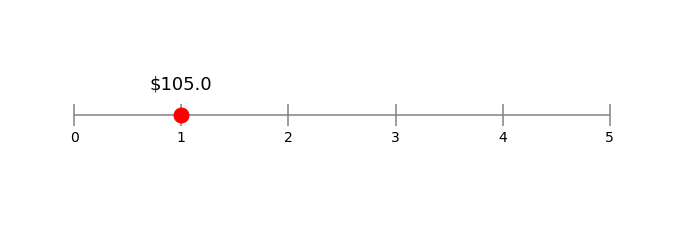

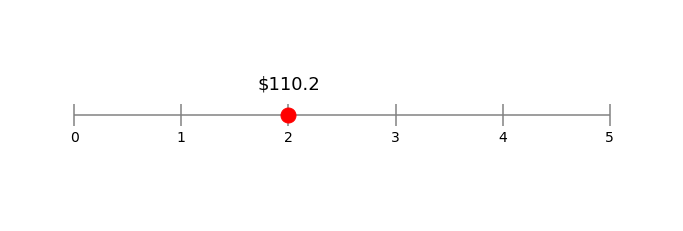

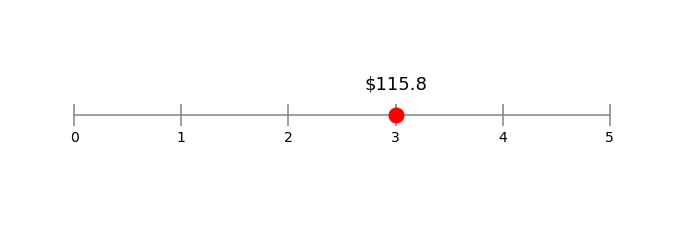

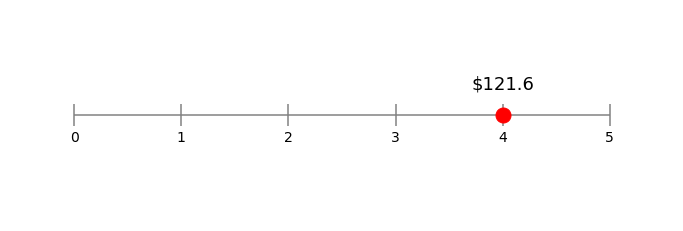

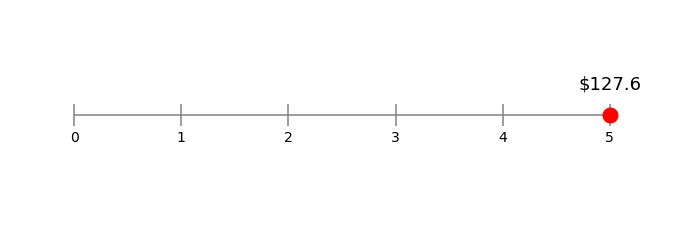

In [5]:
#Plot comoound growth

#Define parameters
periods = 5
principal = 100
r = .05

#Get the value and plot each period
for t in range(periods+1):
    A = principal*(1+r)**t
    timelinePlot(periods,(A,t))

## Discounting a Cashflow

Now, the question is how to do we do this in reverse? For example, what if we start with getting $100 in five years?

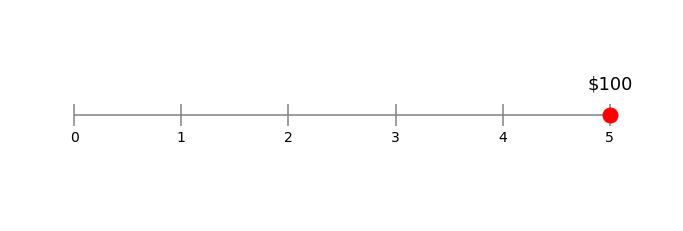

In [6]:
#Now the question is, what is $100 in 5 years worth to us today
timelinePlot(5,(100,5))

Let's take a simple example first. What about $105 in one year? What value would we have had to been given at time 0 if we wanted to have that one year later?

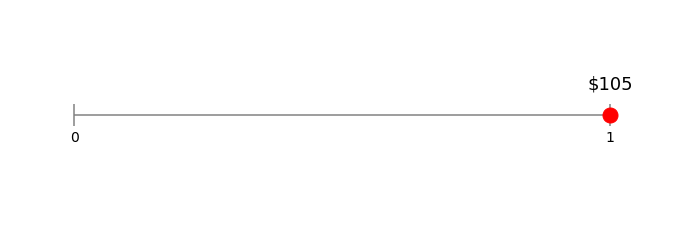

In [7]:
#Start with $105 in one year
timelinePlot(1,(105,1))

If we had $100 and a 5\% interest rate we know we would have ended up at the same place in a year.

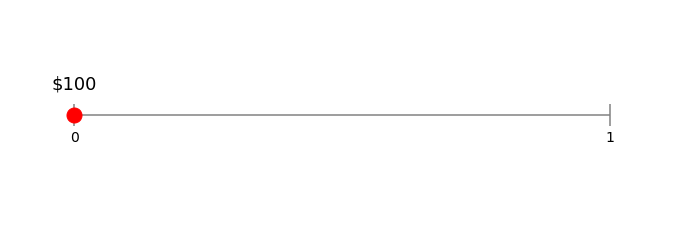

In [8]:
timelinePlot(1,(100,0))

What about $100 in two years? What would we need at time 0 to have gotten this? We can divide by 1.05 twice to get the number.

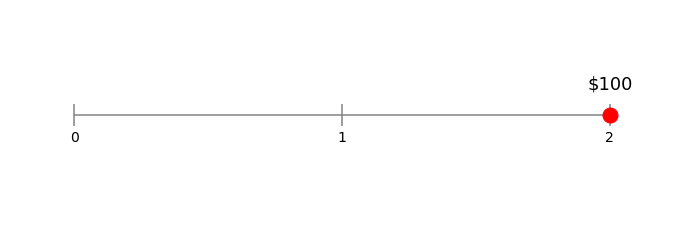

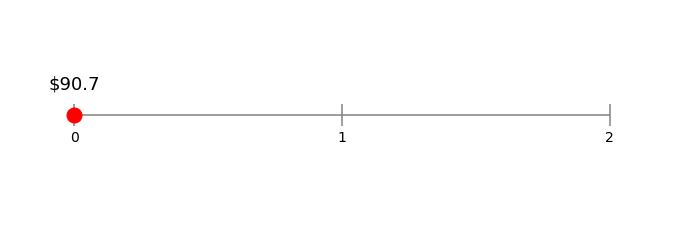

In [9]:
timelinePlot(2,(100,2))

PV = 100 / 1.05 / 1.05
timelinePlot(2,(PV,0))

This brings us to the formula for present value. It is simply the reverse of compounding.

$ PV = \frac{FV}{(1+r)^t}$

where

$ PV = \text{Present Value} $

$ FV = \text{Future Value at time t} $

$ t = \text{Time period for future value} $

$ r = \text{Discount rate} $

Returning to our original question, what is $100 in 5 years from today supposed to be worth if the discount rate is 5%. We can easily solve like below.

In [10]:
PV = 100 / 1.05 ** 5
print(PV)

78.35261664684589


The two cashflows below are equivalent in terms of present value.

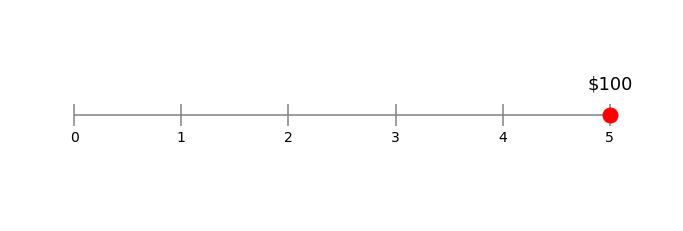

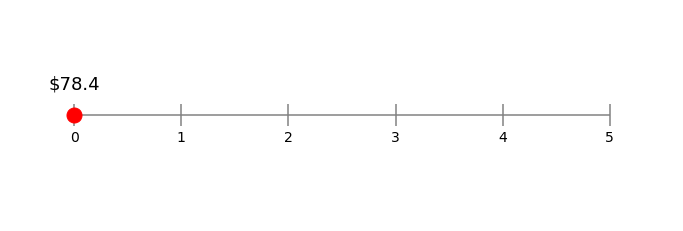

In [11]:
#Plot the equivalent PV cash flows
timelinePlot(5, (100, 5))
timelinePlot(5, (PV, 0))

## Judging Investment Opportunities 

Using present value, if we assume that we can invest/borrow money in the same rate as the discount rate, we are able to see what is a good or bad investment. For example, what if a bank offeres to either lend or hold your money with a 5% return? What do the cash flows look like? We are going to use negative cash flows to represent money we give the bank to hold, and positive to denote money we get. So in this case we get a loan for \\$100 then we give back \\$105 at the end of the year. The first is positive, the second is negative.

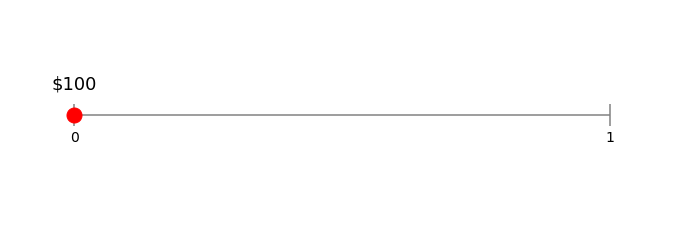

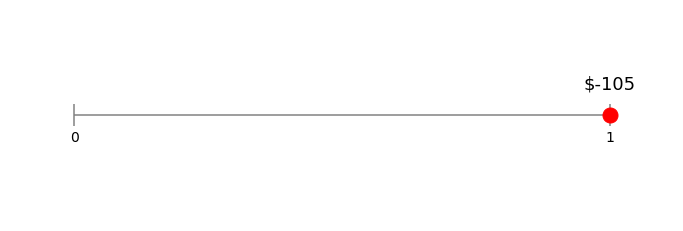

In [12]:
#With the bank, we get 100 at period 0 and must pay back 105 at period 1
timelinePlot(1,(100,0))
timelinePlot(1,(-105,1))

What if we are offered a bond which costs \\$100 right now, but will give you back \\$110? Is this priced correctly? We can answer that by saying what the present value should be.

In [13]:
print(110/1.05)

104.76190476190476


The bond is actually underpriced, it should really be \\$104.76. In this case we have a great deal! To emphasize how this might be underpriced, let's sketch the cashflows from the bond first.

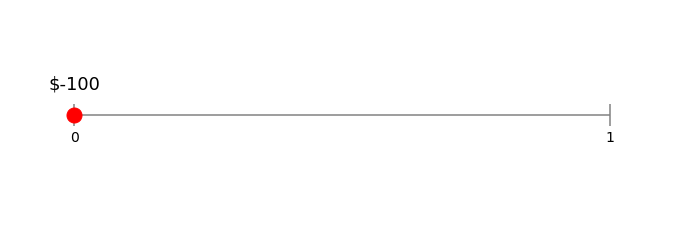

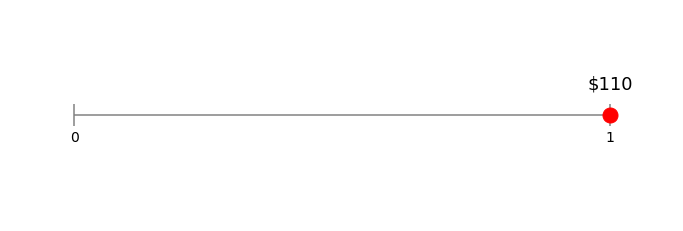

In [14]:
#With the bond we pay $100 in period 0, and get back $110 in period 1
timelinePlot(1,(-100,0))
timelinePlot(1,(110,1))

If we combine taking the bank loan and buying the loan, we see that we actually have a net cashflow of \\$0 at period 0 but end up making \\$5 net profit in period 1!

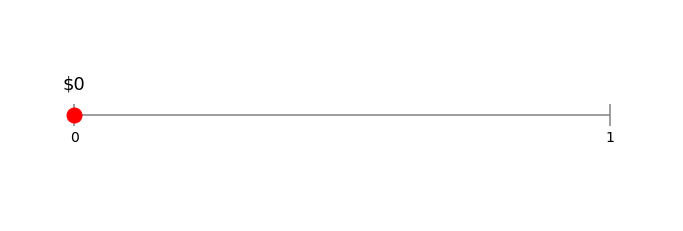

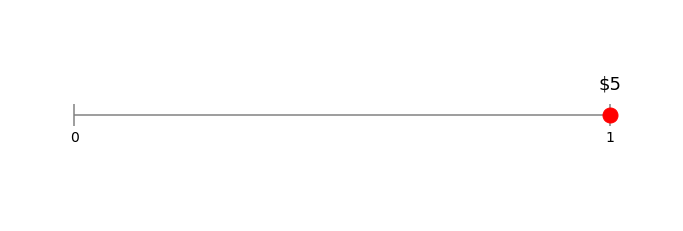

In [15]:
cf0 = 100 - 100
cf1 = 110 - 105
timelinePlot(1,(cf0,0))
timelinePlot(1,(cf1,1))

I am making a modification of the function so that multiple values can be plotted on the same timeline.

In [16]:
def timelinePlot(periods,values):
#Create our plot
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(111)
    
    #Set the limits of our plots (in terms of values, not dimensions)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    
    #Set the minimums that we will be plotting in (we give a 1 or 10% margin on each side)
    xmin = 1
    xmax = 9
    
    #Set the y of where our plot will be centered around, 5 is the middle
    y = 5
    
    #Set height for our ticks
    height = 1
    
    #Get the spacing between each tick
    delta = (xmax-xmin)/periods
    
    #Create the positions for each tick
    positions = [xmin+delta*x for x in list(range(periods+1))]
    
    #Plot the horizontal line
    plt.hlines(y, xmin, xmax, color='grey')

    for t in range(periods+1):
        #Plot the tick
        plt.vlines(positions[t], y - .5, y + .5, color='grey')
        
        #Plot the time period below
        plt.text(positions[t], y-1.2, t, horizontalalignment='center',fontsize=14)
        
    #Get rid of axes
    plt.axis('off')
    
    for value in values:
        #Plot a red dot on the year that our value is at
        plt.plot(positions[value[1]],y, 'ro', ms = 15, mfc = 'r')
        #Plot the values above, use rounding to keep it clean
        plt.text(positions[value[1]], y+1.2, "$"+str(round(value[0],1)), horizontalalignment='center',fontsize=18)

    
    plt.show()

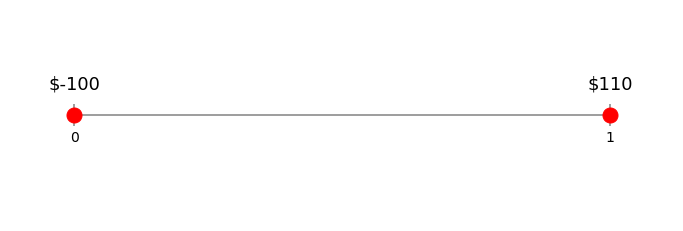

In [17]:
#So the bond decision now looks like this
timelinePlot(1,[(-100,0),(110,1)])

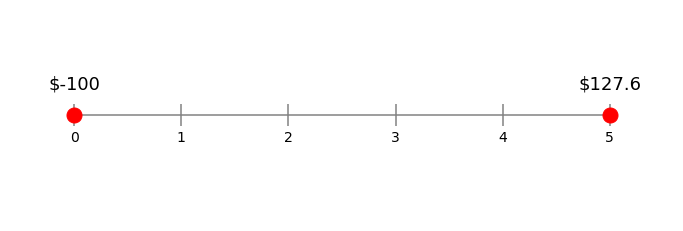

In [18]:
#Or, if we had 5 periods of compounding at 5%
#Notice there are no points in between because we do not take our money out until the 5th year
timelinePlot(5,[(-100,0),(100*(1.05)**5,5)])

## Present Value Outside Endpoints

Up until now, we have only worked through examples where we either take out or put in money in the first period and withdraw it in the last period. This is not realistic to what can happen in the real world. Let's look at how we might value a bond that pays \\$100 in period 3 given a discount rate of 5%. First, what is going to be the present value at time 0?

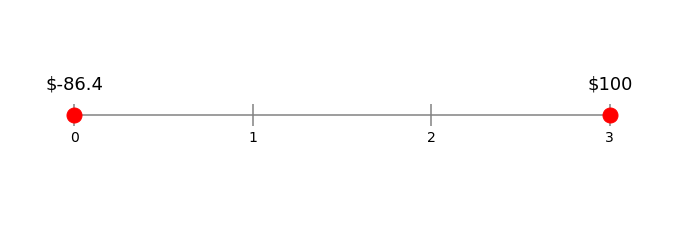

In [19]:
#Now let's say we have a bond that will give us $100 dollars in 3 years and r=.05
timelinePlot(3,[(-100/(1.05)**3,0),(100,3)])

What if the deal that we are offered is that actaully we get to buy the bond at time 2. What price would be fair in this case? The difference between year 3 and year 2 is one year, so we can discount it by only one year in this case.

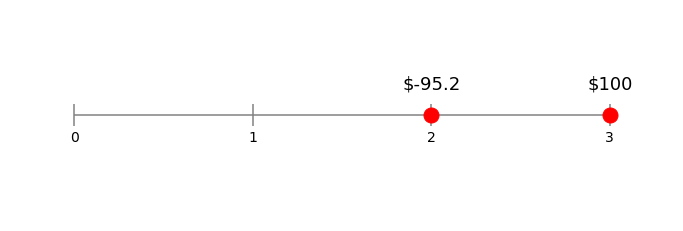

In [20]:
#Now the cashflow at time 2 gets divided by 1.05 ^ 1 because it is only 1 year
timelinePlot(3,[(-100/(1.05)**1,2),(100,3)])

Now you are going to notice that if we discount that present value of \\$95.2 to period 0 we get the same value as discounting \$100 back to period 0.

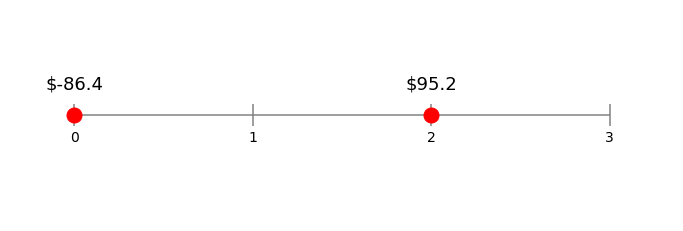

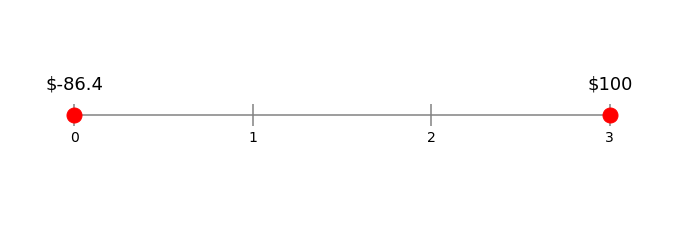

In [21]:
PV = 100/(1.05)**1
timelinePlot(3,[(-100/1.05**3, 0), (PV, 2)])
timelinePlot(3,[(-100/1.05**3, 0), (100, 3)])

# Future Value

Future value is the opposite of present value. It is seeing what a dollar today would be worth at some point in the future given a rate that we can invest at. We have seen it before because it is the same as compound interest.

$ FV = PV * (1+r)^t $

where

$ PV = \text{Present Value} $

$ FV = \text{Future Value} $

$ r = \text{Annual rate of return} $

$ t = \text{Number of years between present value and future value} $

Let's apply this to having \\$100 with an interest rate of 5% for 5 years.

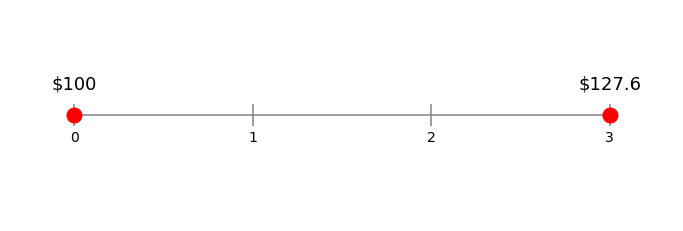

In [22]:
#Start with present value
PV = 100

#Find the future value
FV = 100 * (1.05) ** 5

timelinePlot(3,[(PV, 0), (FV, 3)])

For investments in the same period, you can add them together. For example, if we had both \\$200 in 3 years and \\$100 in 2 years, we may find the present value by adding the two present values together.

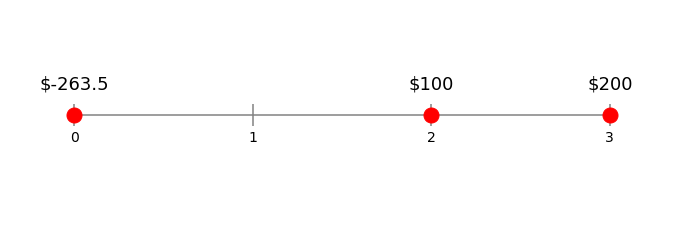

In [23]:
#Since both $172.8 and $90.7 are the present day values at time 0, we can actually add them together
#So the total PV of these two investments would then be
PV = 200/(1.05)**3+100/(1.05)**2
timelinePlot(3,[(-PV,0),(200,3),(100,2)])

If you want to calculate the future value, you can either take the present value and multiply $1.05^3$ or you can take 200 and then add 100 * 1.05 because there is one year of compounding that you get between year 2 and year 3.

In [24]:
#Find the future value from the present value
print(PV * 1.05 ** 3)

#Find the future value from the two future cash flows
print(100 * 1.05 + 200)

305.0
305.0
